##### NAME:- SOMYA RANJAN SAHOO

# Unemployment Analysis during Covid-19 Pandemic Period

In [71]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import warnings
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
warnings.filterwarnings("ignore")
%matplotlib inline

In [72]:
# Load unemployment data
unemployment_data = pd.read_csv("C:/Users/Soumya/Desktop/Data Science/Oasis Infobyte/Task 2/Unemployment_Rate_upto_11_2020.csv")

In [73]:
# Initial data exploration
unemployment_data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [74]:
unemployment_data.shape

(267, 9)

In [75]:
unemployment_data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [76]:
unemployment_data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [77]:
unemployment_data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [78]:
unemployment_data.duplicated().any()

False

In [79]:
unemployment_data.Region.value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: Region, dtype: int64

In [80]:
# Renaming columns for clarity
unemployment_data.columns = ["state", "date", "frequency", "estimated unemployment rate",
                             "estimated employed", "estimated labour participation rate", "region",
                             "longitude", "latitude"]

In [81]:
# Data preprocessing
unemployment_data['date'] = pd.to_datetime(unemployment_data['date'], dayfirst=True)
unemployment_data['month_int'] = unemployment_data['date'].dt.month

<AxesSubplot: >

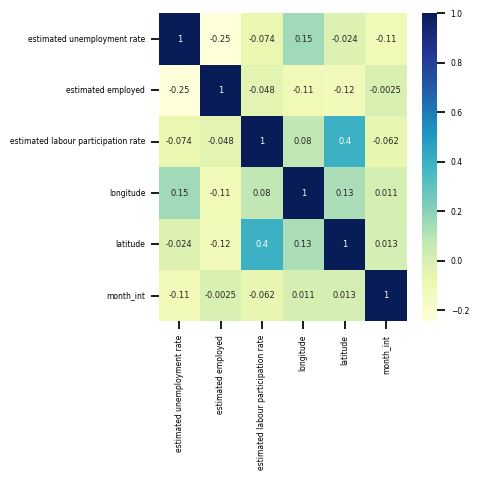

In [82]:
# Heatmap for correlation analysis
heatmap_data = unemployment_data[['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate', 'longitude', 'latitude', 'month_int']]
correlation_matrix = heatmap_data.corr()
plt.figure(figsize=(4, 4))
sns.set_context('notebook', font_scale=0.5)
sns.heatmap(data=correlation_matrix, annot=True, cmap="YlGnBu")

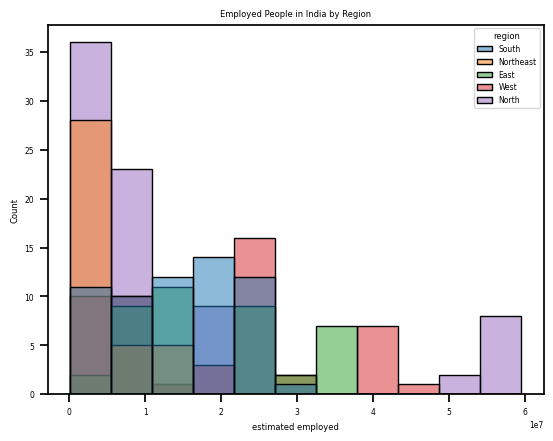

In [83]:
# Histogram of employed people per region
plt.title("Employed People in India by Region")
sns.histplot(x="estimated employed", hue="region", data=unemployment_data)
plt.show()

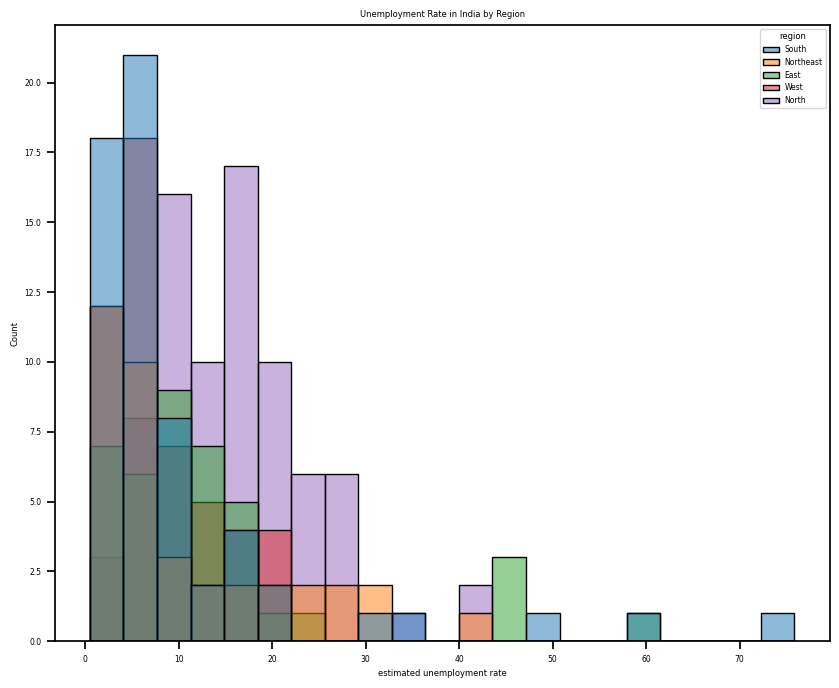

In [84]:
# Histogram of unemployment rate per region
plt.figure(figsize=(10, 8))
plt.title("Unemployment Rate in India by Region")
sns.histplot(x="estimated unemployment rate", hue="region", data=unemployment_data)
plt.show()

In [85]:
# Boxplot of unemployment rate per state
fig = px.box(unemployment_data, x='state', y='estimated unemployment rate', color='state', title='Unemployment Rate by States', template='seaborn')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [10]:
# Scatter matrix showing relationships between unemployment rate, employment, and labor participation rate, color-coded by region.
fig = px.scatter_matrix(unemployment_data, template='plotly',
                        dimensions=['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate'],
                        color='region')
fig.show()

In [11]:
# Bar plot of average unemployment rate per state
unemployment_state_avg = unemployment_data[['estimated unemployment rate', 'state']]
state_unemployment_avg = unemployment_state_avg.groupby('state').mean().reset_index()
state_unemployment_avg = state_unemployment_avg.sort_values('estimated unemployment rate')
fig = px.bar(state_unemployment_avg, x='state', y='estimated unemployment rate', color='state',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()

In [87]:
# Sunburst chart to visualize unemployment rate in India by state and region
unemployment_sunburst_data = unemployment_data[["state", "region", "estimated unemployment rate"]]
sunburst_fig = px.sunburst(unemployment_sunburst_data, path=["region", "state"], values="estimated unemployment rate", width=700, height=700, color_continuous_scale="", title="Unemployment Rate in India")
sunburst_fig.show()

In [88]:
# Geospatial representation of unemployment data
fig = px.scatter_geo(unemployment_data, 'longitude', 'latitude', color="region", hover_name="state", size="estimated unemployment rate", animation_frame="month_int", scope='asia', template='plotly', title='Impact of lockdown on employment across regions')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.update_geos(lataxis_range=[5, 35], lonaxis_range=[65, 100], oceancolor="#2B65EC", showocean=True)
fig.show()

In [89]:
# Analysis before and after lockdown
after_lockdown = unemployment_data[(unemployment_data['month_int'] >= 4) & (unemployment_data['month_int'] <= 6)]
before_lockdown = unemployment_data[(unemployment_data['month_int'] >= 1) & (unemployment_data['month_int'] <= 4)]

In [90]:
after_lockdown_state = after_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown_state = before_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown_state['unemployment rate before lockdown'] = after_lockdown_state['estimated unemployment rate']
lockdown_state.columns = ['state', 'unemployment rate before lockdown', 'unemployment rate after lockdown']

In [91]:
# Calculate rate change in unemployment
lockdown_state['rate change in unemployment'] = round(lockdown_state['unemployment rate before lockdown'] - lockdown_state['unemployment rate before lockdown'] / lockdown_state['unemployment rate after lockdown'], 2)

In [92]:
# Bar chart to visualize percentage change in unemployment rate after lockdown
fig = px.bar(lockdown_state, x='state', y='rate change in unemployment', color='rate change in unemployment', title='Percentage change in Unemployment Rate in each state after lockdown', template='ggplot2')
fig.update_layout(xaxis={'categoryorder': 'total ascending'})
fig.show

<bound method BaseFigure.show of Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'state=%{x}<br>rate change in unemployment=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([ 8.72,  5.34, 20.18,  6.47, 17.01,  7.06,  8.5 , 27.73, 12.7 , 18.08,
                                         18.99,  9.43,  9.07,  5.39,  8.48,  3.48,  9.66, 19.42,  8.26, 13.06,
                                         11.68, 14.5 ,  5.84, 31.89, 11.35,  8.01,  8.4 ]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
                          'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jam